# KNN Python Implementation

In [1]:
import pandas as pd # data processing
from termcolor import colored as cl # elegant printing of text
import seaborn as sb # visualizations
import matplotlib.pyplot as plt # editing visualizations
from matplotlib import style # setting styles for plots
from sklearn.preprocessing import StandardScaler # normalizing data
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.metrics import accuracy_score # algorithm accuracy
from sklearn.model_selection import train_test_split # splitting the data

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (16, 7)

In [2]:
# Importing Data

df = sb.load_dataset('iris')
print(cl(df, attrs = ['bold']))

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
# Data Description

print(cl(df.describe(), attrs = ['bold']))

# Data Info

df.info()

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


After getting a clear understanding of our data, we can move to do some visualizations on it. We are going to create four different visualizations using our data with seaborn and matplotlib in python

Sepal Scatter Python Implementation:

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


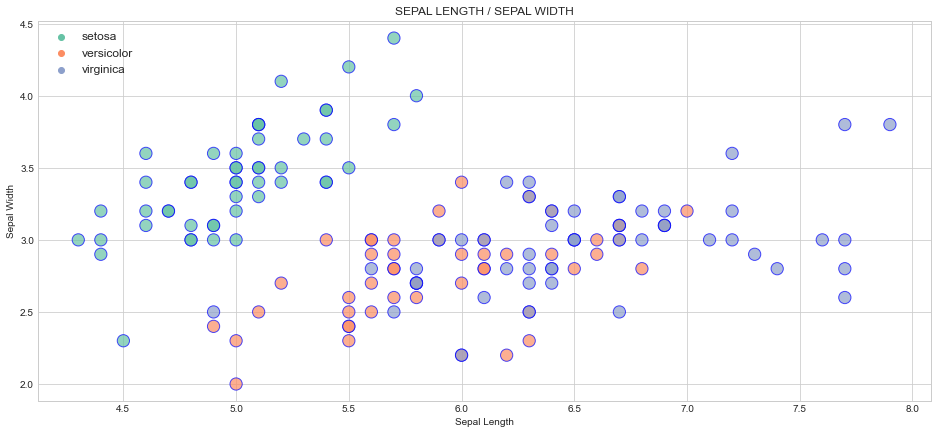

In [4]:
# 1. Sepal scatter visualization

sb.scatterplot('sepal_length', 'sepal_width', data = df, hue = 'species', palette = 'Set2', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('SEPAL LENGTH / SEPAL WIDTH')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('sepal.png')

Petal Scatter Python Implementation:

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


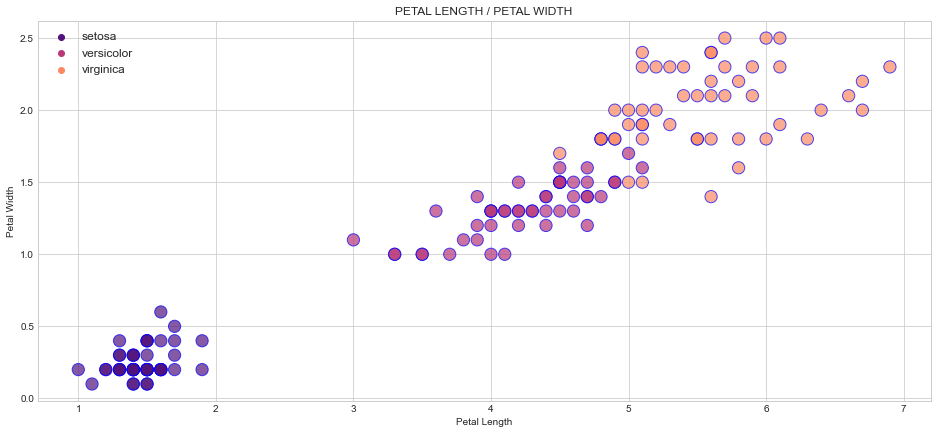

In [5]:
# 2. Petal scatter visualization

sb.scatterplot('petal_length', 'petal_width', data = df, hue = 'species', palette = 'magma', edgecolor = 'b', s = 150, 
               alpha = 0.7)
plt.title('PETAL LENGTH / PETAL WIDTH')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left', fontsize = 12)
plt.savefig('petal.png')

Heatmap

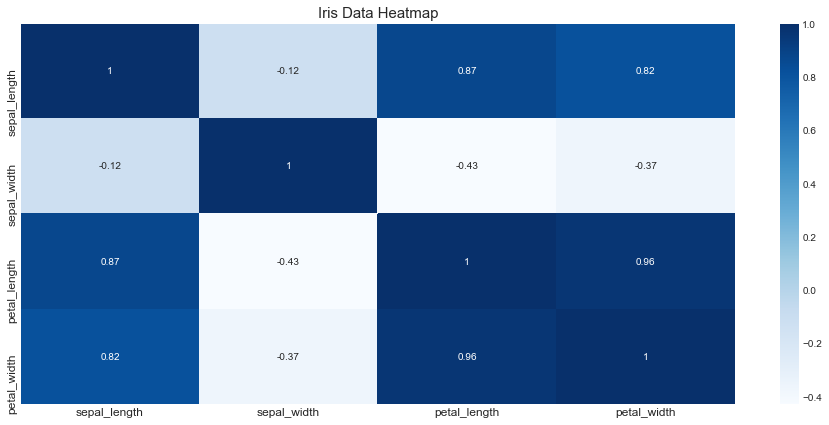

In [6]:

# 3. Data Heatmap

df_corr = df.corr()

sb.heatmap(df_corr, cmap = 'Blues', annot = True, xticklabels = df_corr.columns.values, yticklabels = df_corr.columns.values)
plt.title('Iris Data Heatmap', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('heatmap.png')

Scatter Matrix

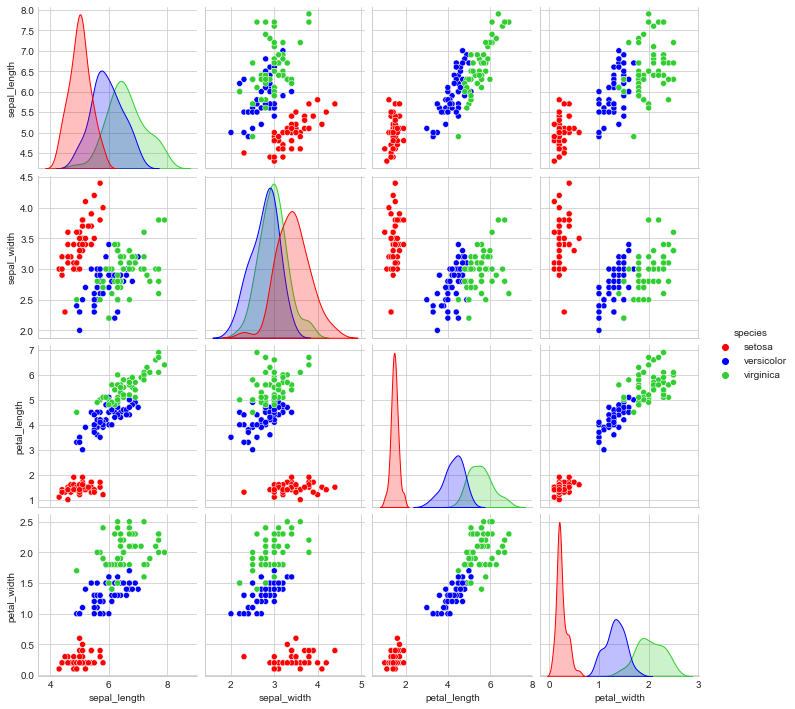

In [7]:
# 4. Scatter Matrix

sb.pairplot(data = df, hue = 'species', palette = ['Red', 'Blue', 'limegreen'])
plt.savefig('pairplot.png')

Distribution Plot

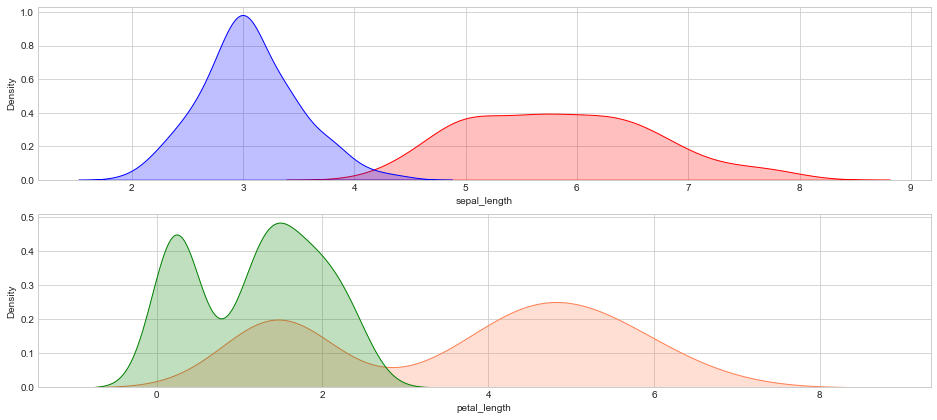

In [8]:
# 5. Distribution plot

plt.subplot(211)
sb.kdeplot(df['sepal_length'], color = 'r', shade = True, label = 'Sepal Length')
sb.kdeplot(df['sepal_width'], color = 'b', shade = True, label = 'Sepal Width')

plt.subplot(212)
sb.kdeplot(df['petal_length'], color = 'coral', shade = True, label = 'Petal Length')
sb.kdeplot(df['petal_width'], color = 'green', shade = True, label = 'Petal Width')

plt.savefig('dist.png')

With this visualization, we are moving on to the next part of coding which is building and training our K-Nearest Neighbor model using scikit-learn in python.

#  Building and Training the model

Firstly, we need to define the ‘X’ variable and a ‘Y’ variable to build our KNN model. Given our dataset, the ‘species’ variable is the one we need to classify and so it can be taken as the ‘Y’ variable or the dependent variable. All the other variables in our dataset can be considered as independent variables or ‘X’ variables. Now, let’s define our X and Y variables in Python!

In [9]:
X_var = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_var = df['species'].values

print(cl('X variable :', attrs = ['bold']), X_var[:5])
print(cl('Y variable :', attrs = ['bold']), y_var[:5])

X variable : [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Y variable : ['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


Now, we have to normalize our ‘X’ variable values which can be useful while training our KNN model. Before that, Normalizing is the process of structuring and removing anomalies for a given set of values. It also reduces data prolixity and improves data integrity. To normalize the values, we can make use of the ‘StandardScaler’ function in scikit-learn. Let’s do it in Python!

In [10]:
X_var = StandardScaler().fit(X_var).transform(X_var.astype(float))
print(cl(X_var[:5], attrs = ['bold']))

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


Now that we have perfect dependent and independent variables. Now, we can proceed with training our KNN model. To train our model, we have to first split our data into a training set and testing set where the training set has the most number of data points. To split our data, we can use the ‘train_test_split’ function provided by scikit-learn in python.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

print(cl('Train set shape :', attrs = ['bold']), X_train.shape, y_train.shape)
print(cl('Test set shape :', attrs = ['bold']), X_test.shape, y_test.shape)

Train set shape : (105, 4) (105,)
Test set shape : (45, 4) (45,)


In [12]:
k = 3

neigh = KNeighborsClassifier(n_neighbors = k)
neigh.fit(X_train, y_train)

print(cl(neigh, attrs = ['bold']))

KNeighborsClassifier(n_neighbors=3)


In [13]:
from sklearn.neighbors import NearestNeighbors
KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                   metric_params=None,n_jobs=None,n_neighbors=3,p=2,
                   weights='uniform')

KNeighborsClassifier(n_neighbors=3)

Firstly, we specified our ‘K’ value to be 3. Next, we defined our algorithm and finally, fitted our train set values into the algorithm. After printing out the algorithm we can see that ‘metric=minkowski’ which is nothing but it states that the method used to calculate the neighbor distance is the Minkowski method. There are also other methods like the Euclidean distance method and Jaccard index method but it needs to be defined manually.
After finishing training our KNN algorithm, let’s predict the test values by our trained algorithm and evaluate our prediction results using scikit-learn’s evaluation metrics

In [14]:
yhat = neigh.predict(X_test)

print(cl('Prediction Accuracy Score (%) :', attrs = ['bold']), round(accuracy_score(y_test, yhat)*100, 2))

Prediction Accuracy Score (%) : 97.78


Using our trained KNN algorithm, we have predicted the test set values. Finally, we used the ‘accuracy_score’ evaluation metric to check the accuracy of our predicted results. In the output, we can see that the results are 97.78% accurate which means our KNN model performed really well for the given iris dataset also, it has the capability to solve real-world classification problems. With that, we have successfully built, trained, and evaluated our KNN model in python.